# SCAM/LES Output Plotting Package
## Set up modules (standard and mine) 

In [23]:
### Import Standard Packages 
import matplotlib.pyplot as mp
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np
import metpy.calc as mpc
import metpy.constants as mconst
import xarray as xr
import scipy as spy
import pandas as pd
import datetime as dt
import cartopy


### To Import My Functions ###
import scam_func as mypy
import importlib


#### CONSTANTS #####
r_gas = mconst.dry_air_gas_constant.magnitude   # Specific gas constant for dry air
cp_air = mconst.dry_air_spec_heat_press.magnitude # Specific heat for dry air
Lv = mconst.water_heat_vaporization.magnitude       # Latent heat of vaporization

r_cp = r_gas/cp_air    # r/cp
grav = mconst.earth_gravity.magnitude       # Gravity ave.
p0 = mconst.pot_temp_ref_press.magnitude

#%xmode Plain   ## Fortran-like error tracebacks (doesn't seem to work though)

# Add Experiment Set 

In [24]:
'''
IOP and simulations (LES/SCAM/WRF?) info
'''



case_iop = "PERDIGAO" ; scam_file_nums = ['001','002','003','004'] ; scam_run_names = ['x01','x02','x03','x04']

#case_iop = "SAS" ; scam_file_nums = ['106.norad','106d.norad','LES'] ; scam_run_names = ['CAM6-L32','CAM6-L256','NCAR']
                                 
#case_iop = "RICO" ; scam_file_nums = ['001'] ; scam_run_names = ['RICO1']







########## BASE DIRS ############

dir_root = '/Users/rneale/Documents/NCAR/PBL/PBL_py_data/'
fig_root = '/Users/rneale/python-figs/PBL/'



# Diagnostic Field Selections
## List of variables for each plot type

In [31]:
# Global Vars. #

fig_file = True # Need to add this in RBN
fig_screen = True
all_vars_info = True # List all variables that can be plotted in each 'set'



#### PLOTTING ####

""" ### ### ### ### """
""" ###  1D TS  ### """
""" ### ### ### ### """
#pvars_ts1d = np.array(['PBLH','TS','LHFLX','SHFLX','PRECC','PRECL','FLNS']) # D profile timeseries plots
#pvars_ts1d = np.array(['SHFLX','LHFLX','PBLH','PBLH_DQ'])

pvars_ts1d = np.array(['PBLH'])



""" ### ### ### ### """
""" ###  2D TS  ### """
""" ### ### ### ### """

## WPSKEW is WP3_CLUBB/WP2_CLUBB**3/2
#pvars_ts2d = ['T','Q','RELHUM','TH','THL','CLOUD','ZMDQ','ZMDT', 
#            'STEND_CLUBB','RVMTEND_CLUBB','WPTHLP_CLUBB','WPRTP_CLUBB','WP3_CLUBB','THLP2_CLUBB','WP2_CLUBB'] # 2D profile timeseries plots
#pvars_ts2d = ['DTV','VD01','DCQ','Q','T','TH','THL']
#pvars_ts2d = ['THV','TH','Q','WP2_CLUBB','WP3_CLUBB','WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','RTP2_CLUBB']
pvars_ts2d = np.array(['Q','TH','WPTHLP_CLUBB'])


""" ### ### ### ### ### """
""" ### 1D SNAPSHOT ### """
""" ### ### ### ### ### """

#pvars_ts2d = ['T','Q','RELHUM','TH','THL','CLOUD','ZMDQ','ZMDT','DTCOND','DCQ']\
#pvars_ts2d = ['STEND_CLUBB','RVMTEND_CLUBB','WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','WP2_CLUBB','WP3_CLUBB'] 
    
#pvars_snap = ['TH','THL','Q','RELHUM','DTV','DCQ','STEND_CLUBB','WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','WP2_CLUBB','WP3_CLUBB']
#pvars_snap = ['TH','Q','WP2_CLUBB','WP3_CLUBB','WPTHLP_CLUBB','WPRTP_CLUBB','THLP2_CLUBB','RTP2_CLUBB']
pvars_snap = np.array(['Q','TH','WPTHLP_CLUBB'])

tsnaps = np.array([6.,8.,10.,12.,14.,16.])     # Time of snapshots (local time)




""" ### ### ###   ### """
""" ###  1D MEAN  ### """
""" ### ### ###   ### """






""" ### ### ### ###  ### """
""" ### PROF BUDGETS ### """  # Not used yet
""" ### ### ### ###  ### """







""" ### ### ### ### ### """
""" ### ANIMATIONS ###  """ # Not used yet
""" ### ### ### ### ### """
    
#pvars_anim = np.array(('Q'))





' ### ### ### ### ### '

# File and Array Setups 

In [32]:

####### DERIVED VARS #######

scam_fig_stub=fig_root+case_iop+'_'.join(scam_file_nums)


### Bundle these into array for passing to functions ###
run_info = {}
run_info['pvars_list'] = all_vars_info
run_info['1dvars'] = pvars_ts1d
run_info['2dvars'] = pvars_ts2d
run_info['snapvars'] = pvars_snap

####### GRAPHICS ########
#mp.interactive(True)
#%matplotlib qt
%matplotlib inline


### Change List to np array ### 

scam_file_nums = np.array(scam_file_nums) 
scam_run_names = np.array(scam_run_names) 


### Bundle run info ###
run_info['Case IOP']   = case_iop
run_info['Run Name']   = scam_run_names
run_info['File Num']   = scam_file_nums
run_info['Stub Figs']  = scam_fig_stub
run_info['Snap Times']  = tsnaps
run_info['Dir Root'] = dir_root

### Bundle some options ###
run_info['Var List'] = all_vars_info




# Plot type selection 

+++ IMPORTING MY FUNCTIONS +++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++ ALL AVAILABLE VARIABLES FOR =>  2d_ts  <= ++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,long_name,vscale,cmin,cmax,acmin,acmax,var_les,lscale,units
T,Temperature,1.0,260.0,305.00,-0.50,0.50,,1.000000e+00,K
RELHUM,Relative Humidity,1.0,10.0,120.00,-10.00,10.00,,1.000000e+00,%
CLOUD,Cloud Fraction,100.0,0.0,100.00,-10.00,10.00,,1.000000e+00,%
Q,Specific Humidity,1000.0,1.0,12.00,-2.00,2.00,q,1.000000e+03,g/kg
TH,Potential Temperature,1.0,295.0,305.00,-0.50,0.50,t,1.000000e+00,K
THL,Liquid Water Potential Temperature,1.0,270.0,310.00,-1.00,1.00,thl,1.000000e+00,K
THV,Virtual Potential Temperature,1.0,295.0,305.00,-2.00,2.00,tv,1.000000e+00,K
DCQ,Humidity Tendencies - Moist Processes,1000.0,-5.0,5.00,-1.00,1.00,,1.000000e+00,g/kg/day
DTCOND,Temperature Tendencies - Moist Processes,86400.0,-10.0,10.00,-1.00,1.00,,1.000000e+00,K/day
ZMDT,Temperature Tendencies - Deep Convection,86400.0,-10.0,10.00,-1.00,1.00,,1.000000e+00,K/day



PERDIGAO  - 2D PLOTTING VARIABLES
<xarray.DataArray (time: 72)>
array([ 2.        ,  2.33333333,  2.66666667,  3.        ,  3.33333333,
        3.66666667,  4.        ,  4.33333333,  4.66666667,  5.        ,
        5.33333333,  5.66666667,  6.        ,  6.33333333,  6.66666667,
        7.        ,  7.33333333,  7.66666667,  8.        ,  8.33333333,
        8.66666667,  9.        ,  9.33333333,  9.66666667, 10.        ,
       10.33333333, 10.66666667, 11.        , 11.33333333, 11.66666667,
       12.        , 12.33333333, 12.66666667, 13.        , 13.33333333,
       13.66666667, 14.        , 14.33333333, 14.66666667, 15.        ,
       15.33333333, 15.66666667, 16.        , 16.33333333, 16.66666667,
       17.        , 17.33333333, 17.66666667, 18.        , 18.33333333,
       18.66666667, 19.        , 19.33333333, 19.66666667, 20.        ,
       20.33333333, 20.66666667, 21.        , 21.33333333, 21.66666667,
       22.        , 22.33333333, 22.66666667, 23.        , 23.33333333,

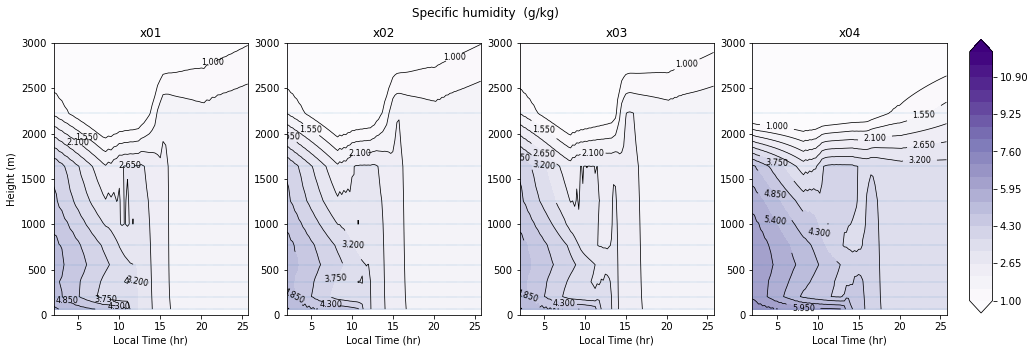


<xarray.DataArray (time: 72)>
array([ 2.        ,  2.33333333,  2.66666667,  3.        ,  3.33333333,
        3.66666667,  4.        ,  4.33333333,  4.66666667,  5.        ,
        5.33333333,  5.66666667,  6.        ,  6.33333333,  6.66666667,
        7.        ,  7.33333333,  7.66666667,  8.        ,  8.33333333,
        8.66666667,  9.        ,  9.33333333,  9.66666667, 10.        ,
       10.33333333, 10.66666667, 11.        , 11.33333333, 11.66666667,
       12.        , 12.33333333, 12.66666667, 13.        , 13.33333333,
       13.66666667, 14.        , 14.33333333, 14.66666667, 15.        ,
       15.33333333, 15.66666667, 16.        , 16.33333333, 16.66666667,
       17.        , 17.33333333, 17.66666667, 18.        , 18.33333333,
       18.66666667, 19.        , 19.33333333, 19.66666667, 20.        ,
       20.33333333, 20.66666667, 21.        , 21.33333333, 21.66666667,
       22.        , 22.33333333, 22.66666667, 23.        , 23.33333333,
       23.66666667, 24.        , 

/Users/rneale/python-scripts/PBL/scam_func.py:628: UserWarning: No contour levels were found within the data range.
  ax1.clabel(plt0, fontsize=8, colors='black')


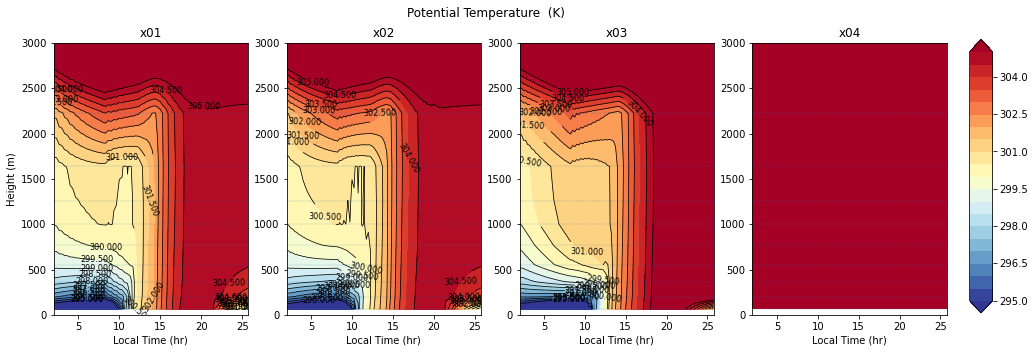


<xarray.DataArray (time: 72)>
array([ 2.        ,  2.33333333,  2.66666667,  3.        ,  3.33333333,
        3.66666667,  4.        ,  4.33333333,  4.66666667,  5.        ,
        5.33333333,  5.66666667,  6.        ,  6.33333333,  6.66666667,
        7.        ,  7.33333333,  7.66666667,  8.        ,  8.33333333,
        8.66666667,  9.        ,  9.33333333,  9.66666667, 10.        ,
       10.33333333, 10.66666667, 11.        , 11.33333333, 11.66666667,
       12.        , 12.33333333, 12.66666667, 13.        , 13.33333333,
       13.66666667, 14.        , 14.33333333, 14.66666667, 15.        ,
       15.33333333, 15.66666667, 16.        , 16.33333333, 16.66666667,
       17.        , 17.33333333, 17.66666667, 18.        , 18.33333333,
       18.66666667, 19.        , 19.33333333, 19.66666667, 20.        ,
       20.33333333, 20.66666667, 21.        , 21.33333333, 21.66666667,
       22.        , 22.33333333, 22.66666667, 23.        , 23.33333333,
       23.66666667, 24.        , 

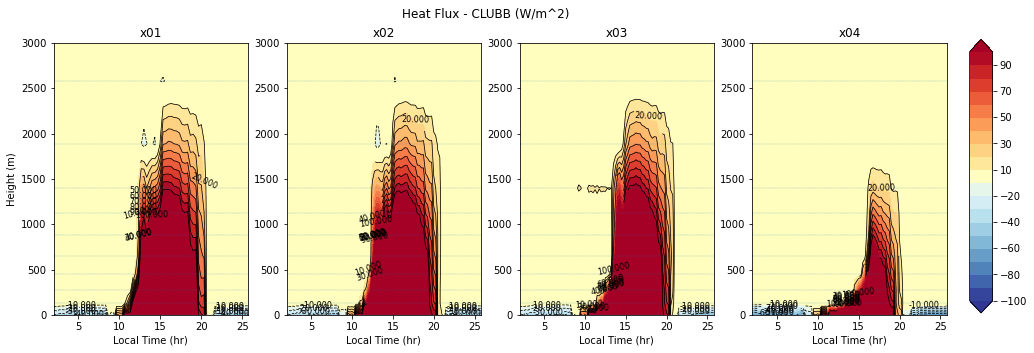

' \n##### STILL TO DO #####\n'

In [33]:
###### Plotting ##########

importlib.reload(mypy) # Required because I am constantly editing scam_func.py

'''
###### PLOT SETS ######
'''

#mypy.plot1d_ts_scam(run_info)   # 1D time series plots
mypy.plot2d_ts_scam(run_info)   # 2D time series plots
#mypy.plot1d_snap_scam(run_info)   # 1D snapshot plots






''' 
##### STILL TO DO #####
'''

#mypy.plot1d_anim_scam(run_info) # 2D profile animation plots

## New plot sets
#mypy.plot1d_mean_scam(run_info)   # 1D mean profiles
#mypy.plot1d_budget_scam(run_info)   # 1D mean profiles


